In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
FILE_PATH = os.path.join(os.path.sep, os.getcwd(), 'source', '')

In [66]:
# Получаем список нужных имен файлов
file_list = os.listdir(path=FILE_PATH)
need_files = list()
years = list()
for i in range(1900, 2001):
    for x in file_list:
        if str(i) in x:
            need_files.append(x)
            years.append(i)

In [107]:
frame = pd.DataFrame()
cols = ['name', 'gender', 'value']  
my_list = []
for file in need_files:
    df = pd.read_csv(FILE_PATH + file, index_col=None, header=None, names=cols)
    my_list.append(df)
    frame = pd.concat(my_list, keys=years, names=['year', 'id'])
    new = pd.DataFrame(frame.groupby(['name'])['value'].sum())

In [108]:
x = new.reset_index()

In [109]:
x.columns = ['name', 'value']

In [110]:
x['vowels'] = x.name.str.lower().str.count(r'[bcdfghjklmnpqrstvwxz]')

In [111]:
x = x.groupby(['name', 'vowels']).sum()

In [112]:
x = x.reset_index()

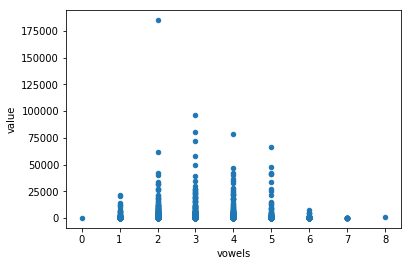

In [117]:
x.plot.scatter(x='vowels', y='value')
